## Introduction to NumPy

  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

In [135]:
import numpy as np
np.__version__

'1.8.0.dev-9597b1f'

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image

## Where to get help

- http://docs.scipy.org
- Forums: mailing list, http://ask.scipy.org, http://stackoverflow.com

## Where do I learn more?

- <a href="http://mentat.za.net/numpy/intro/intro.html">NumPy introductory tutorial</a>
- <a href="http://scipy-lectures.github.com">SciPy Lectures</a>

Let's make sure you are comfortable in your IPython environment:

- Tab completion
- Docstring inspection
- Magic commands: %timeit, %paste, %loadpy, %run
- Compare notebook vs qtconsole vs terminal

In [23]:
%qtconsole

## NumPy vs pure Python -- a speed comparison

In [137]:
x = np.random.random(1024)

%timeit [t**2 for t in x]
%timeit x**2

1000 loops, best of 3: 1.48 ms per loop
100000 loops, best of 3: 6.73 us per loop


## The structure of a NumPy array

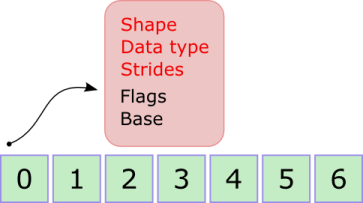

In [7]:
Image(filename="ndarray_struct.png")

In [6]:
x = np.array([[1, 4], [2, 8]], dtype=np.uint8)
x

array([[1, 4],
       [2, 8]], dtype=uint8)

In [3]:
x.shape, x.dtype, x.strides, x.size, x.ctypes.data

((2, 2), dtype('uint8'), (2, 1), 4, 55962256)

In [4]:
print [ord(c) for c in x.data]

[1, 4, 2, 8]


In [8]:
y = x.T
y.shape, y.dtype, y.strides, y.size, y.ctypes.data

((2, 2), dtype('uint8'), (1, 2), 4, 58831280)

## Constructing arrays

In [25]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
np.ones((2, 2))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [9]:
np.array([[1, 2], [-1, 5]])

array([[ 1,  2],
       [-1,  5]])

In [30]:
np.zeros_like(x)

array([[ 0.,  0.],
       [ 0.,  0.]])

In [31]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [32]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [38]:
np.random.random((3, 3))

array([[ 0.00787819,  0.36848661,  0.31869234],
       [ 0.86500956,  0.30282794,  0.85699127],
       [ 0.51951301,  0.35215536,  0.85616153]])

In [59]:
x = np.random.random((2,2,3,2,2))

In [60]:
print x.shape

(2, 2, 3, 2, 2)

## Shape

In [35]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
x.reshape((3, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Visualization

In [50]:
import matplotlib.pyplot as plt

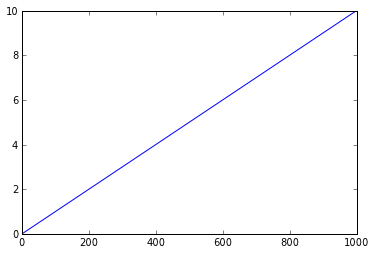

In [53]:
x = np.linspace(0, 10, 1000)
plt.plot(x)

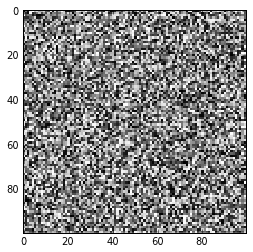

In [55]:
x = np.random.random((100, 100))
plt.imshow(x, interpolation='none', cmap=plt.cm.gray)

## Indexing

In [64]:
x = np.array([[1, 2, 3], [3, 2, 1]])
x

array([[1, 2, 3],
       [3, 2, 1]])

In [66]:
x[0, 1]

2

In [69]:
x[1]

array([3, 2, 1])

In [72]:
x[:, 1:3]

array([[2, 3],
       [2, 1]])

### Fancy indexing -- indexing with arrays

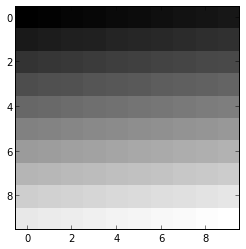

In [11]:
x = np.arange(100).reshape((10, 10))
plt.imshow(x, interpolation='nearest', cmap=plt.cm.gray)

In [12]:
mask = (x < 50)
mask[:5, :5]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [13]:
mask.shape

(10, 10)

In [14]:
x[mask]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

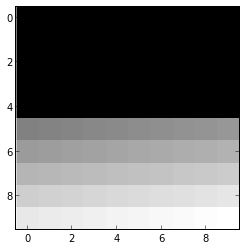

In [15]:
x[mask] = 0
plt.imshow(x, interpolation='none', cmap=plt.cm.gray)

### Views

In [97]:
x = np.arange(10)
y = x[0:3]

print x, y

[0 1 2 3 4 5 6 7 8 9] [0 1 2]

In [98]:
y.fill(8)

In [99]:
print x, y

[8 8 8 3 4 5 6 7 8 9] [8 8 8]

## Data types

In [83]:
x = np.array([1,2,3])
print x.dtype

int64

In [84]:
x = np.array([1.5, 2, 3])
print x.dtype

float64

In [85]:
x = np.array([1, 2, 3], dtype=np.float)
print x.dtype

float64

## Broadcasting


<img src="broadcast_scalar.svg"/>

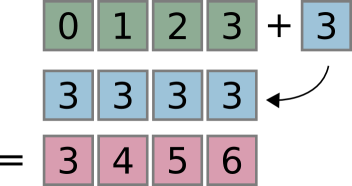

In [16]:
Image(filename="broadcast_scalar.png")

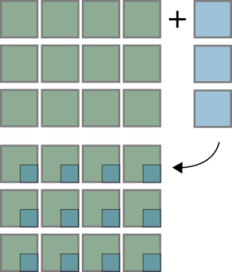

In [17]:
Image(filename="broadcast_2D.png")

In [18]:
x, y = np.ogrid[:5:0.5, :5:0.5]

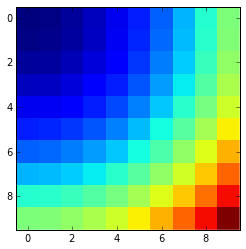

In [20]:
plt.imshow(x**2 + y**2, interpolation='none')

## Expressions and universal functions

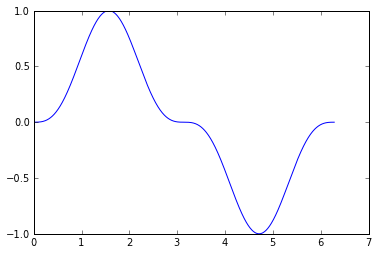

In [74]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) ** 3

plt.plot(x, y)

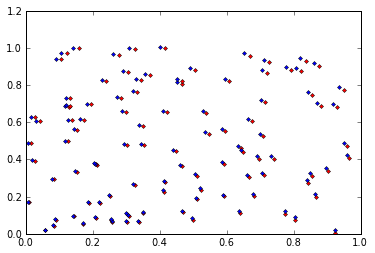

In [129]:
theta = np.deg2rad(1)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
v = np.random.random((100, 2))
v_ = R.dot(v.T).T

plt.plot(v[:, 0], v[:, 1], 'r.')
plt.plot(v_[:, 0], v_[:, 1], 'b.')

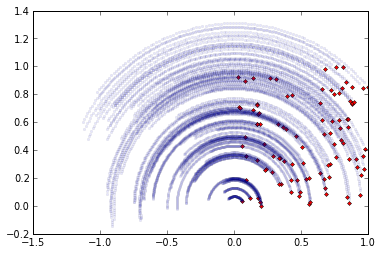

In [137]:
theta = np.deg2rad(1)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
v = np.random.random((100, 2))
plt.plot(v[:, 0], v[:, 1], 'r.')
v_ = R.dot(v.T).T

for i in range(100):
    v_ = R.dot(v_.T).T
    plt.plot(v_[:, 0], v_[:, 1], 'b.', markersize=3, alpha=0.1)

## Input/output

In [78]:
hand = np.loadtxt('hand.txt')
hand[:5]

array([[ 1.64516129,  1.16145833],
       [ 1.64516129,  1.59375   ],
       [ 1.35080645,  1.921875  ],
       [ 1.375     ,  2.18229167],
       [ 1.68548387,  1.9375    ]])

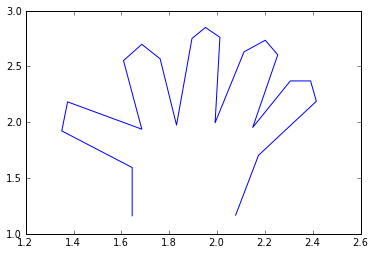

In [79]:
plt.plot(hand[:, 0], hand[:, 1])

In [36]:
# Use the NumPy binary format--do not pickle!
# np.save and np.savez

## Structured arrays

In [103]:
dt = np.dtype([('station', 'S4'), ('year', int), ('level', (float, 12))])

In [104]:
x = np.zeros((3,), dtype=dt)
x

array([('', 0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       ('', 0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       ('', 0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])], 
      dtype=[('station', 'S4'), ('year', '<i8'), ('level', '<f8', (12,))])

In [106]:
r = np.loadtxt('rainfall.txt', dtype=dt)

In [107]:
r['station']

array(['AAEF', 'CABF', 'BDII', 'IPLS'], 
      dtype='|S4')

In [110]:
mask = (r['station'] == 'AAEF')
r[mask]

array([ ('AAEF', 1980, [0.1, 0.3, 1.1, 0.4, 3.1, 1.8, 8.6, 3.4, 1.2, 3.3, 9.5, 1.2])], 
      dtype=[('station', 'S4'), ('year', '<i8'), ('level', '<f8', (12,))])

In [113]:
r[mask]['level']

array([[ 0.1,  0.3,  1.1,  0.4,  3.1,  1.8,  8.6,  3.4,  1.2,  3.3,  9.5,
         1.2]])

## Reductions

In [19]:
a = np.arange(12).reshape((3, 4))

In [20]:
a.mean(axis=0)

array([ 4.,  5.,  6.,  7.])

In [21]:
a.sum()

66

In [22]:
x = np.array([1 + 1j, 2 + 2j])

In [23]:
x.real

array([ 1.,  2.])

In [26]:
y = np.array([-0.1, -0.05, 0.35, 0.5, 0.9, 1.1])

In [27]:
y.clip(0, 0.5)

array([ 0.  ,  0.  ,  0.35,  0.5 ,  0.5 ,  0.5 ])

## Beyond the ndarray

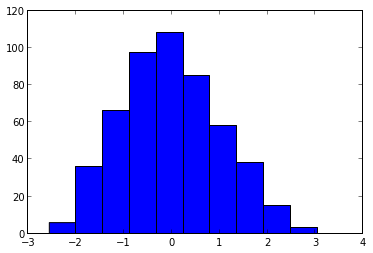

In [28]:
x = np.random.normal(0, 1, size=512)

import matplotlib.pyplot as plt
plt.hist(x);

In [29]:
A = np.array([[1, 2], [-1, 1]])
b = np.array([1, 1])

# Solve for x: Ax = b
np.linalg.solve(A, b)

array([-0.33333333,  0.66666667])

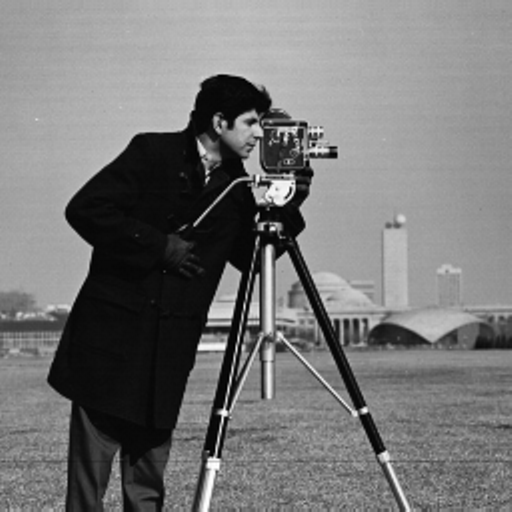

In [31]:
from skimage import data
image = data.camera()
image

In [32]:
image.shape

(512, 512)

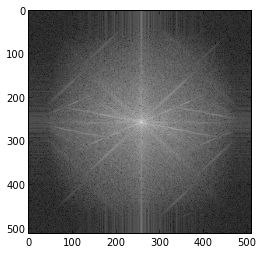

In [33]:
F = np.fft.fft2(image)

F_ = np.log(5 + np.fft.fftshift(np.abs(F)))
plt.imshow(F_, cmap=plt.cm.gray)

In [34]:
p = np.polynomial.Polynomial([3, -3, 2, 5])
p.roots()

array([-1.25703127+0.j        ,  0.42851563-0.54193122j,
        0.42851563+0.54193122j])

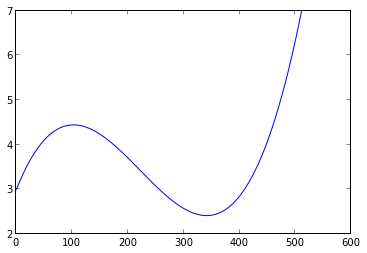

In [35]:
t = np.linspace(-1, 1, 512)
plt.plot(p(t));